In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import glob
import os
from collections import Counter

In [2]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
counts_dir = "../../gutenberg/data/counts/"
tokens_dir = "../../gutenberg/data/tokens/"

In [14]:
%%time
pattern="PG123*_*.txt"

counts = Counter()
for path in glob.glob(os.path.join(counts_dir, pattern)):
    counts += Counter({k:int(v) for k,v in np.loadtxt(path, dtype=str)})

CPU times: user 4.3 s, sys: 32 ms, total: 4.33 s
Wall time: 4.33 s


In [15]:
%%time
for i in range(10):
    subpattern = "PG123%d*_*.txt"%i
    ! cat {(os.path.join(tokens_dir, subpattern))} | sort | uniq -c | sort -nr > /tmp/test_{i}.txt

counts2 = Counter()
for path in glob.glob("/tmp/test_?.txt"):
    counts2 += Counter({v:int(k) for k,v in np.loadtxt(path, dtype=str)})

counts2.most_common()[:10]

CPU times: user 1.99 s, sys: 128 ms, total: 2.12 s
Wall time: 9.73 s


In [16]:
counts.most_common()[:5]

[('the', 474822),
 ('of', 283006),
 ('and', 268843),
 ('to', 193873),
 ('a', 169339)]

In [17]:
counts2.most_common()[:5]

[('the', 471386),
 ('of', 281360),
 ('and', 267411),
 ('to', 192555),
 ('a', 168419)]

In [19]:
! ls /tmp/test_?.txt

/tmp/test_0.txt  /tmp/test_3.txt  /tmp/test_6.txt  /tmp/test_9.txt
/tmp/test_1.txt  /tmp/test_4.txt  /tmp/test_7.txt
/tmp/test_2.txt  /tmp/test_5.txt  /tmp/test_8.txt


In [21]:
x, y = np.loadtxt("/tmp/PG_all_counts_binned.txt").T

Text(0,0.5,'$N(n)$')

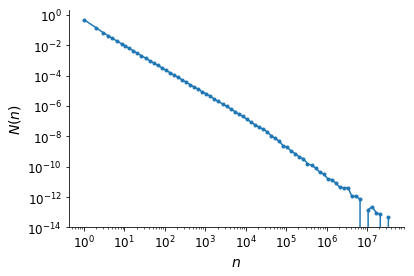

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.loglog(x, y, ".-")
ax.set_xlabel("$n$")
ax.set_ylabel("$N(n)$")